# 计算各种值

**均值**

均值（mean）是一组数值的算术平均数，即所有数值相加后除以数值的个数。在Python中，可以使用以下代码计算一组数值的均值：


In [1]:
def mean(numbers):
    return sum(numbers) / len(numbers)

numbers = [1, 2, 3, 4, 5]
result = mean(numbers)
print("均值为：", result)

均值为： 3.0


**中位数**

中位数是将一组数据从小到大排序后，位于中间位置的数。如果数据个数为奇数，则中位数就是中间的那个数；如果数据个数为偶数，则中位数是中间两个数的平均值。


In [2]:
def find_median(nums):
    nums.sort()
    length = len(nums)
    if length % 2 == 0:
        return (nums[length // 2 - 1] + nums[length // 2]) / 2
    else:
        return nums[length // 2]

# 示例
nums = [3, 5, 1, 4, 2]
median = find_median(nums)
print("中位数是：", median)

中位数是： 3


**众数**

众数是指在一组数据中出现次数最多的数值。在Python中，可以使用collections模块的Counter类来找出众数并输出每个数字出现的频率。


In [3]:
from collections import Counter

def find_modes(numbers):
    # 使用Counter统计每个数字出现的次数
    counter = Counter(numbers)
    
    # 找到出现次数最多的数字
    max_count = max(counter.values())
    modes = [num for num, count in counter.items() if count == max_count]
    
    return modes

# 测试
numbers = [1, 1, 1, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 11]
modes = find_modes(numbers)
print("众数是：", modes)

众数是： [1, 2]


计算每个数字出现的频率：

In [4]:
def count_frequency(numbers):
    frequency = {}
    for num in numbers:
        if num in frequency:
            frequency[num] += 1
        else:
            frequency[num] = 1
    return frequency

numbers = [1, 2, 3, 2, 1, 3, 1, 1, 2, 3, 3, 3]
result = count_frequency(numbers)
print(result)

{1: 4, 2: 3, 3: 5}


# 离散与相关

**极差**

极差是指一组数据中最大值与最小值之间的差。计算极差的步骤如下：

1. 找到数据集中的最大值和最小值。
2. 计算最大值与最小值之间的差。

In [5]:
def find_range(data):
    min_value = min(data)
    max_value = max(data)
    range_value = max_value - min_value
    return range_value

data = [1, 2, 3, 4, 5]
range_value = find_range(data)
print("极差为：", range_value)

极差为： 4


**方差与标准差**

方差是衡量数据波动的一种指标，它描述的是观测值与平均数之间的偏离程度。具体来说，方差就是各个数据与平均数之差的平方的和的平均数。而标准差则是方差的算术平方根，也就是离均差平方的算术平均数的平方根，常用σ表示。标准差能反映一个数据集的离散程度，它是数值分散程度的一种直观度量。

对比两者，我们可以看出，方差和标准差都是用来衡量数据的离散程度的，只不过计算方式不同。方差是各数据偏离平均值的差值的平方和的平均数，通过平方的方式放大了离均值较远的数据的影响；而标准差则是对方差的平方根，它将方差的值约束在一个非负实数范围内，可以更好地反映出数据的分布情况。在实际应用中，我们通常使用标准差而非方差来分析数据的离散程度，因为标准差的单位与原始数据的单位相同，更便于理解。

方差计算公式：

$$\mathrm{Var}(X) = \frac{1}{n}\sum_{i=1}^{n}(X_i - \bar{X})^2$$
其中，$X_i$表示第$i$个数据，$\bar{X}$表示数据的平均值，$n$表示数据的总个数。

标准差的计算公式为：

$$\mathrm{Std}(X) = \sqrt{\mathrm{Var}(X)}$$
其中，$X$表示数据，$mathrm{Var}(X)$表示数据的方差。

In [6]:
def variance(data):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / n

def standard_deviation(data):
    var = variance(data)
    return var ** 0.5

data = [1, 2, 3, 4, 5]
print("方差：", variance(data))
print("标准差：", standard_deviation(data))

方差： 2.0
标准差： 1.4142135623730951


使用标准库来进行计算：

In [7]:
import statistics

data = [1, 2, 3, 4, 5]
variance = statistics.variance(data)
print("Variance:", variance)

Variance: 2.5


In [8]:
import statistics

data = [1, 2, 3, 4, 5]
std_deviation = statistics.stdev(data)
print("Standard Deviation:", std_deviation)

Standard Deviation: 1.5811388300841898


# 两个数据集之间的相关性

皮尔森相关系数是一种线性相关系数，用于度量两个变量X和Y之间的相关（线性相关），其值介于-1与1之间。  

皮尔森相关系数的计算公式为：$r = Σ[(xi - xmean)(yi - ymean)] / sqrt[Σ(xi - xmean)^2 * Σ(yi - ymean)^2]$，其中$xi$和$yi$分别表示变量X和Y的第i个观测值，$xmean$和$ymean$表示变量X和Y的均值。

皮尔森相关系数的计算公式为：

$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$

接着实现相关的函数：

In [9]:
def pearson_correlation_coefficient(x, y):
    n = len(x)
    if n != len(y):
        raise ValueError("输入的两个列表长度不一致")

    sum_x = sum(x)
    sum_y = sum(y)
    sum_x_square = sum([i ** 2 for i in x])
    sum_y_square = sum([i ** 2 for i in y])
    sum_xy = sum([x[i] * y[i] for i in range(n)])

    numerator = n * sum_xy - sum_x * sum_y
    denominator = ((n * sum_x_square - sum_x ** 2) * (n * sum_y_square - sum_y ** 2)) ** 0.5

    if denominator == 0:
        return 0

    return numerator / denominator

# 示例
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
print(pearson_correlation_coefficient(x, y))  # 输出：1.0

1.0


假设有高中成绩和大学入学考试成绩：

In [10]:
x = [90, 92, 95, 96, 87, 87, 90, 95, 98, 96]  # 高考成绩
y = [85, 87, 86, 97, 96, 88, 89, 98, 98, 87]  # 大学入学成绩

计算皮尔森相关系数：

In [11]:
pearson_correlation_coefficient(x, y)

0.3183785775683751

In [12]:
import numpy as np

x = [90, 92, 95, 96, 87, 87, 90, 95, 98, 96]
y = [85, 87, 86, 97, 96, 88, 89, 98, 98, 87]

pearson_corr = np.corrcoef(x, y)[0, 1]
print(pearson_corr)

0.3183785775683752


# 散点图

可以绘制上面的数据的散点图：

In [13]:
import matplotlib.pyplot as plt

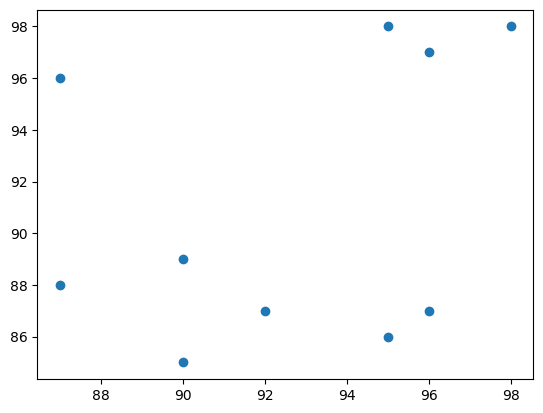

In [14]:
plt.scatter(x, y)
plt.show()

# 从文件中读取数据

**从txt文件中读取数据**

从txt文件中读取数据：

In [15]:
def sum_data(filename):
    '''该函数会读取一个文件并且计算所有数字的总和'''
    s = 0
    with open(filename) as f:
        for line in f:
            s = s + float(line)
    print("Sum of the numbers:{0}".format(s))

if __name__ == "__main__":
    sum_data('mydata.txt')

Sum of the numbers:5733.0


或者我们可以重构一下上述代码：

In [18]:
# 读取文件中的数据
def read_file(filename):
    '''read a file and append numbers into a list'''
    number_list = []
    with open(filename) as f:
        for line in f:
            number_list.append(float(line))

    return number_list

# 对列表中的数据进行求和
def cal_sum(number_list):
    '''计算列表中的数字的和'''
    total = sum(number_list)
    return total

# 开始计算
if __name__ == "__main__":
    num_list = read_file('mydata.txt')
    sum_result = cal_sum(num_list)
    print("The sum of the numbers in the file is {0}".format(sum_result))

The sum of the numbers in the file is 5733.0


**从csv中读取数据**

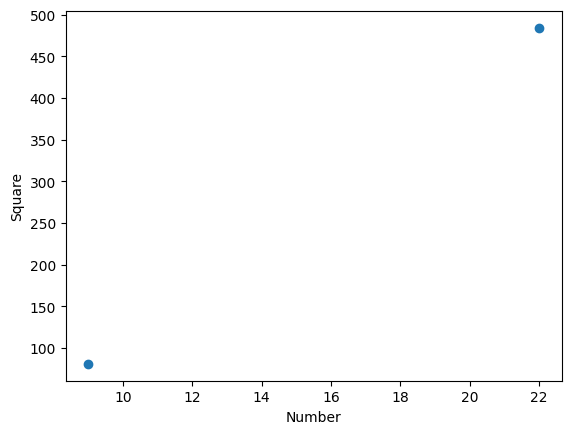

In [31]:
import csv
import matplotlib.pyplot as plt

def scatter_plot(x, y):
    plt.scatter(x, y)
    plt.xlabel('Number')
    plt.ylabel('Square')
    plt.show()

def read_csv(filename):
    numbers = []
    squared = []

    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            numbers.append(int(row[0]))
            squared.append(int(row[1]))
    return numbers, squared        

if __name__ == "__main__":
    numbers, squared = read_csv('numbers.csv')
    scatter_plot(numbers, squared)